<a href="https://www.kaggle.com/code/omarmedhat1/logistic-regression-with-87-accuracy?scriptVersionId=191096455" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


# Loading Data
*Here, we load the dataset from the provided CSV file and display the first few rows*

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data Overview
*We inspect the structure and summary statistics of the dataset*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Missing Values Analysis**
*We check for missing values in the dataset*

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Dropping Unnecessary Columns**
*We drop the 'education' column due to high percentage of missing values*

In [6]:
df.drop('education', inplace=True, axis=1)
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Correlation Analysis
*We compute and visualize the correlation matrix to identify features highly correlated with the target variable 'TenYearCHD'*

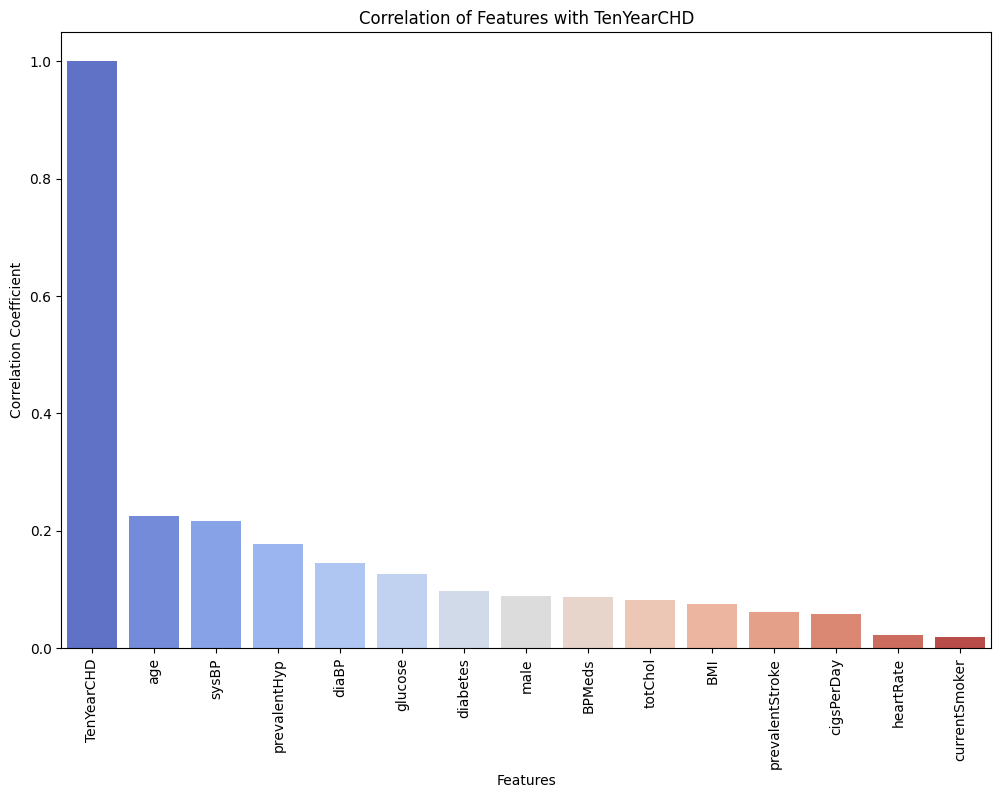

In [7]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with 'TenYearCHD'
correlation_with_TenYearCHD = correlation_matrix['TenYearCHD'].sort_values(ascending=False)

# Plot the correlation values with 'diagnosis'
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_TenYearCHD.index, y=correlation_with_TenYearCHD.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation of Features with TenYearCHD')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

**High Correlation Features**
*We list features that have high correlation with the target variable 'TenYearCHD'*

In [8]:
# Select features with high correlation with 'TenYearCHD'
high_correlation_features = correlation_with_TenYearCHD[abs(correlation_with_TenYearCHD) > 0.1]
print("Highly correlated features:\n", high_correlation_features)

Highly correlated features:
 TenYearCHD      1.000000
age             0.225256
sysBP           0.216429
prevalentHyp    0.177603
diaBP           0.145299
glucose         0.125544
Name: TenYearCHD, dtype: float64


**Visualizing Key Features**
*We create box plots to visualize the distribution of top features with respect to the target variable*

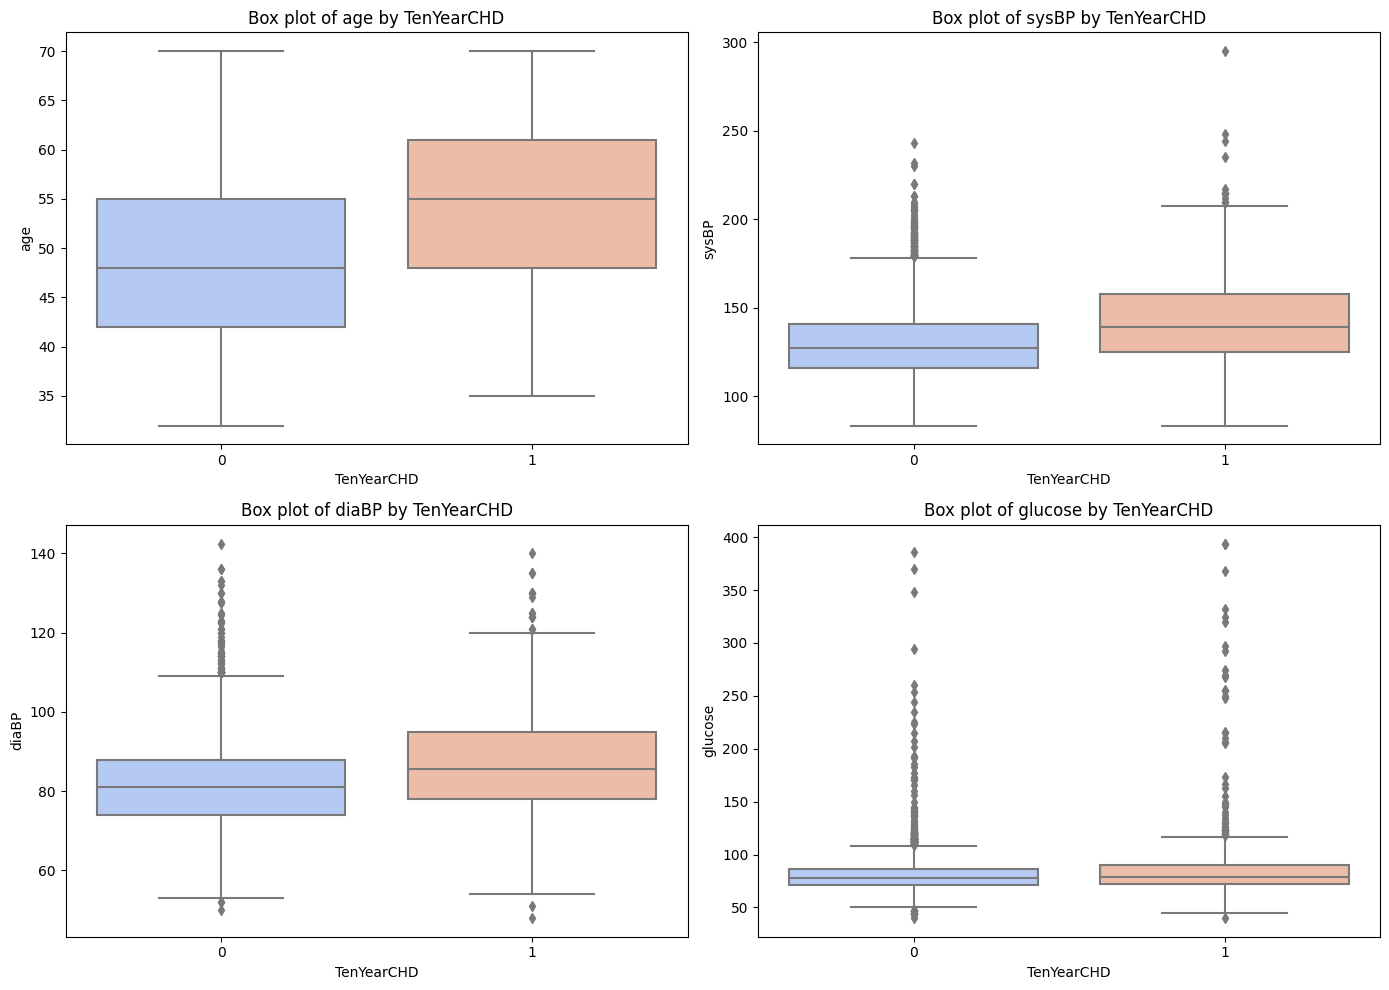

In [9]:
top_4_features = [
    'age',
    'sysBP',
    'diaBP',
    'glucose'
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(top_4_features):
    sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Box plot of {feature} by TenYearCHD')
    axes[i].set_xlabel('TenYearCHD')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

**Removing Outliers**
*We define a function to remove outliers and apply it to the top features*

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each of the top 4 features
for feature in top_4_features:
    df = remove_outliers(df, feature)

# Verify the data after removing outliers
print(df.describe())

              male          age  currentSmoker   cigsPerDay       BPMeds  \
count  3534.000000  3534.000000    3534.000000  3511.000000  3489.000000   
mean      0.445388    49.189304       0.497170     9.141840     0.022356   
std       0.497079     8.506210       0.500063    11.992749     0.147860   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    48.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      3534.000000   3534.000000  3534.000000  3526.000000  3534.000000   
mean          0.005376      0.279853     0.007357   236.231991   129.645444   
std           0.073137      0.448990     0.085470    44.284561    18.253361   

# Feature Distribution
*We visualize the distribution of top features after removing outliers*

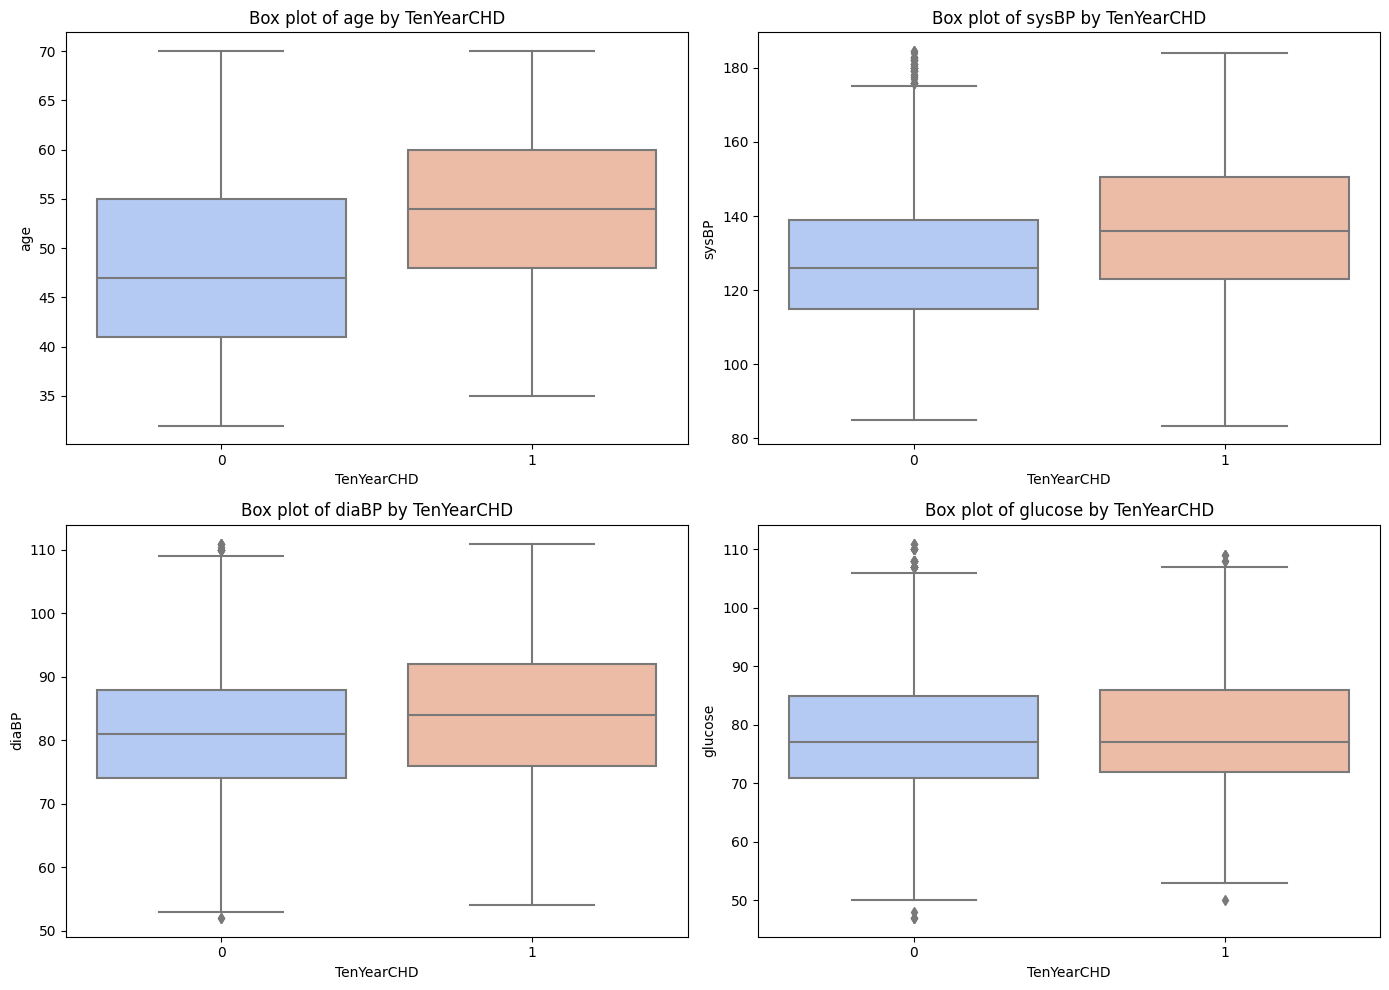

In [11]:
top_4_features = [
    'age',
    'sysBP',
    'diaBP',
    'glucose'
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(top_4_features):
    sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Box plot of {feature} by TenYearCHD')
    axes[i].set_xlabel('TenYearCHD')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

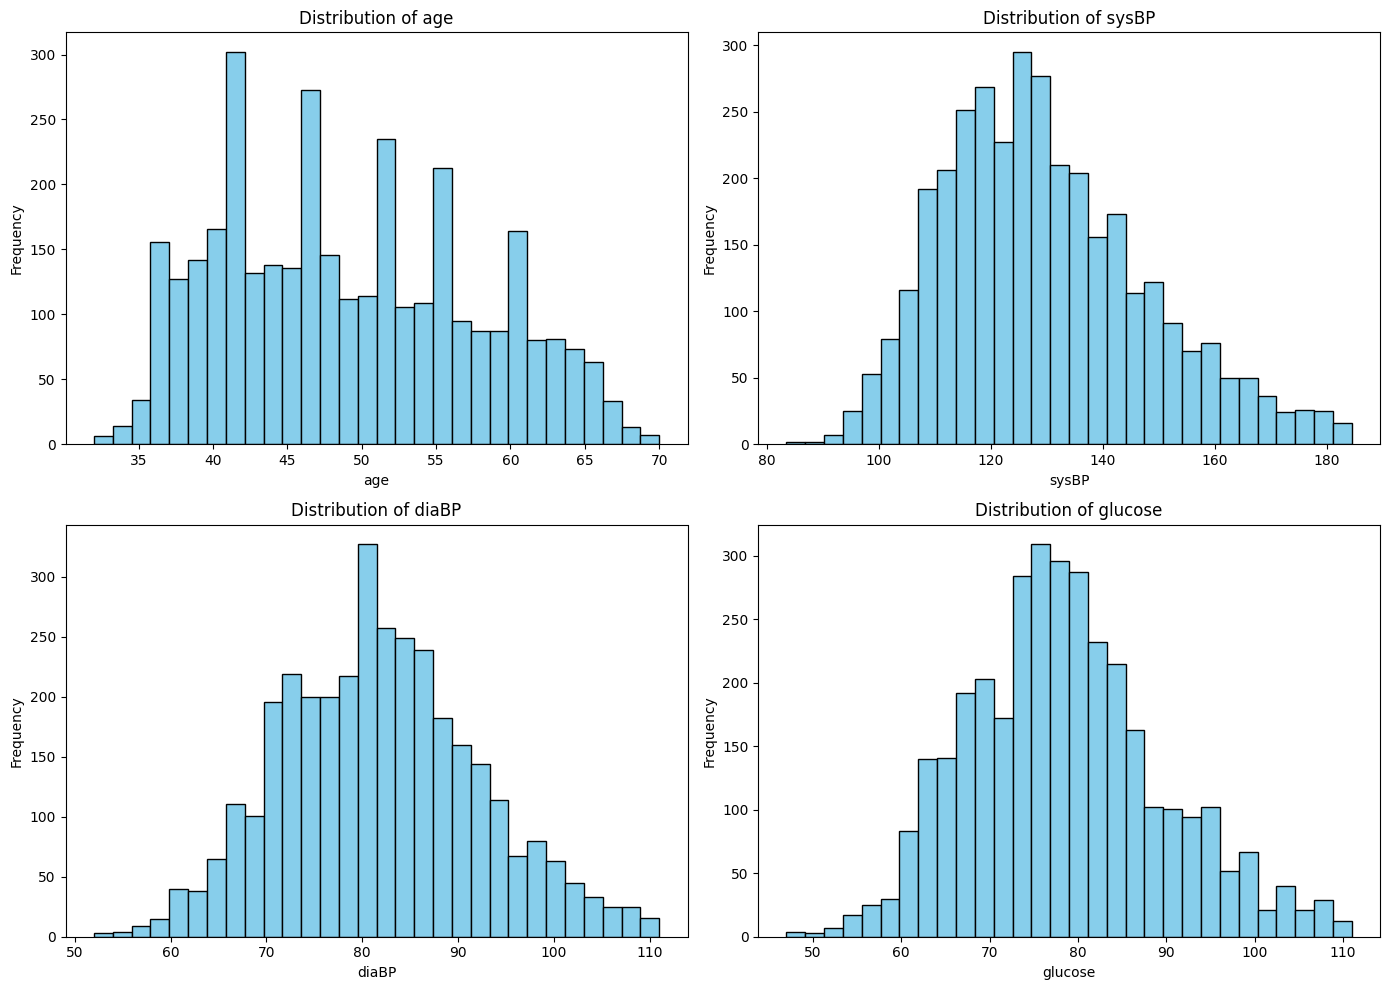

In [12]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  # Optional: remove rows with NaN values if this makes sense for your analysis

# List of features to plot
top_4_features = ['age', 'sysBP', 'diaBP', 'glucose']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(top_4_features):
    axes[i].hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Handling Missing Values**
*We fill missing values in the dataset using appropriate methods*

In [13]:
# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())  # Fill missing values in 'age' with median
df[['sysBP', 'diaBP', 'glucose']] = df[['sysBP', 'diaBP', 'glucose']].fillna(df[['sysBP', 'diaBP', 'glucose']].mean())  # Fill missing values with mean for the specified columns

# Verify that there are no missing values left
print(df.isnull().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


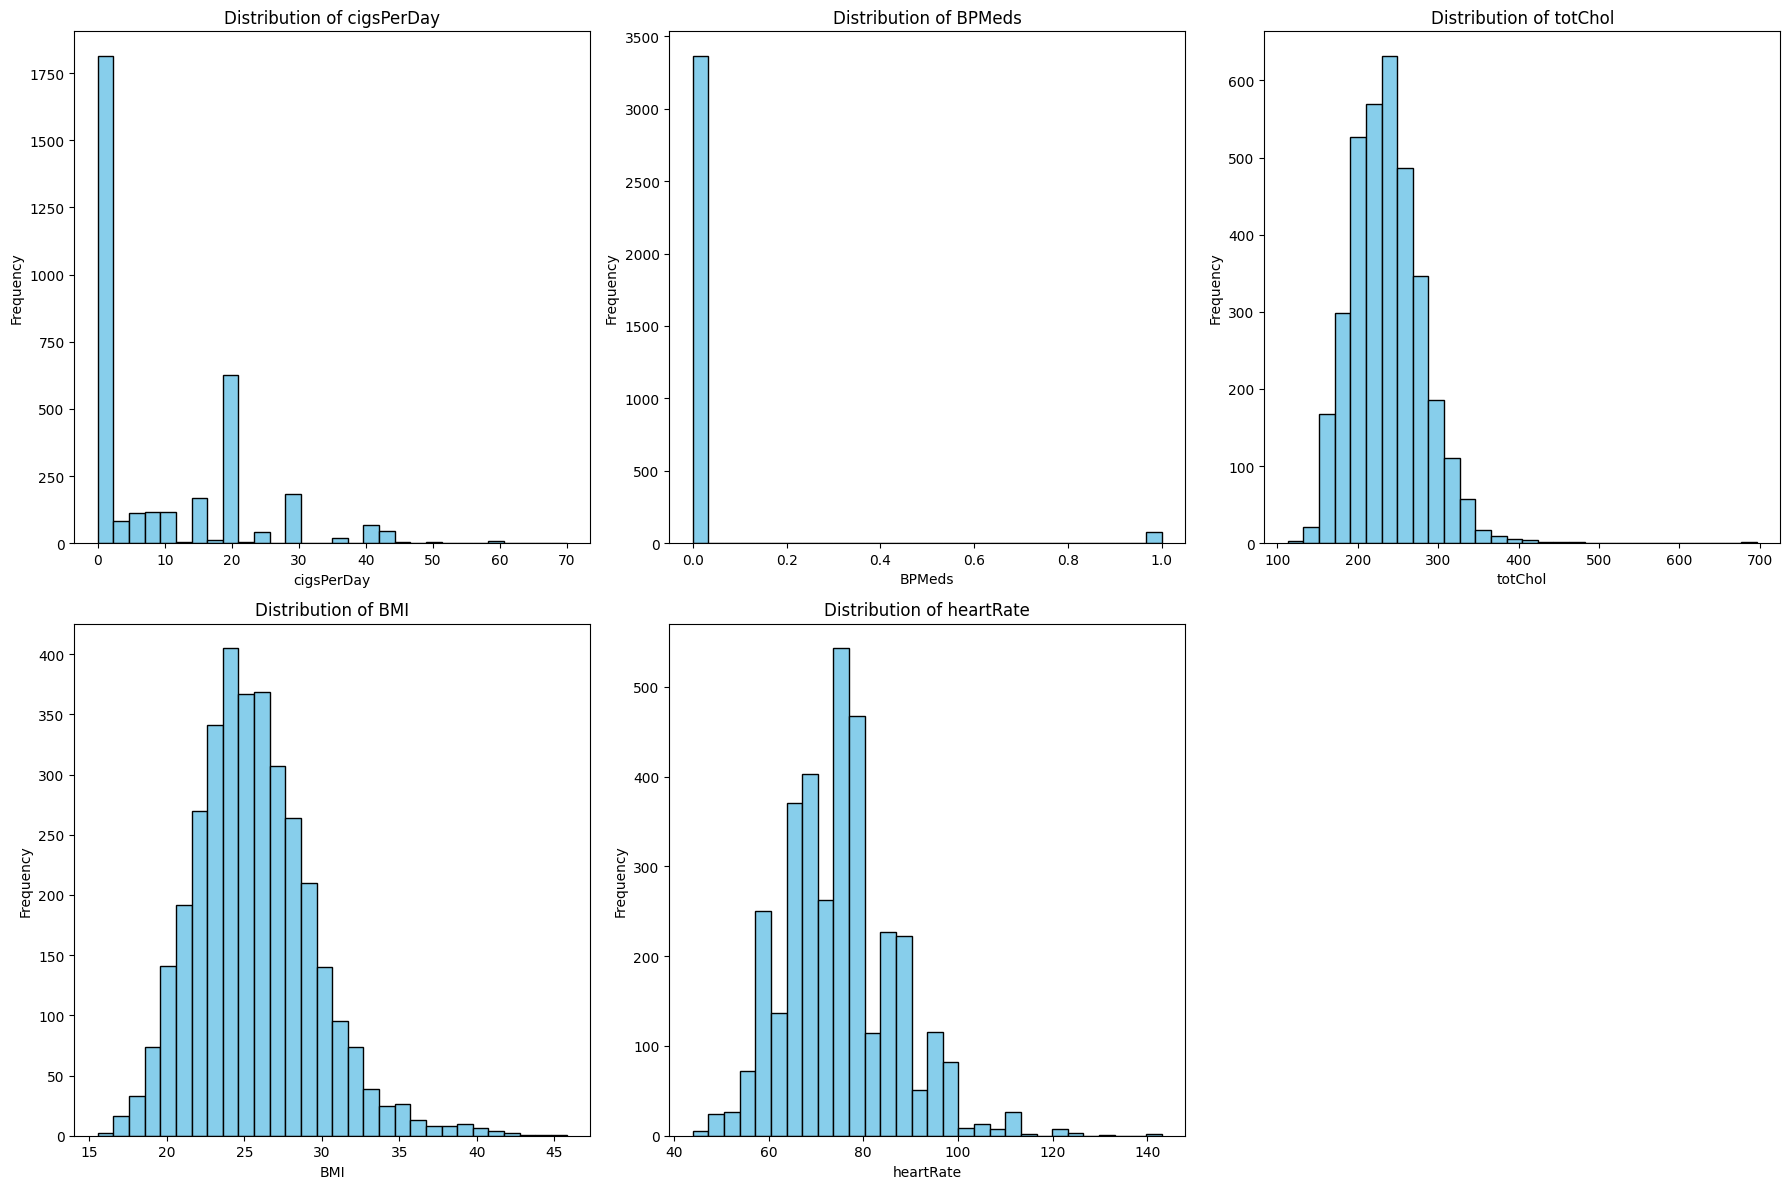

In [14]:
# Replace infinite values with NaN in the DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# List of features with missing values
features_with_missing_values = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_with_missing_values):
    axes[i].hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(len(features_with_missing_values), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
# Fill missing values with median for specific features
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())

# List of other features to fill with mean
features_with_mean_fill = ['age', 'totChol', 'sysBP', 'diaBP', 'glucose', 'BMI', 'heartRate']
df[features_with_mean_fill] = df[features_with_mean_fill].fillna(df[features_with_mean_fill].mean())

# Verify that there are no missing values left
print(df.isnull().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


**Splitting Data**
*We split the data into training and testing sets*

In [16]:
x = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

**Feature Engineering**

In [17]:
x['age_BMI_interaction'] = x['age'] * x['BMI']

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Scaling Features**
*We standardize the features using StandardScaler*

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Building and Training the Model
*We train a logistic regression model*

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

**Model Prediction**
*We make predictions using the trained model*

In [21]:
y_pred = model.predict(x_test_scaled)

# Model Evaluation
*We evaluate the model performance using various metrics*

Accuracy: 0.8679245283018868
Confusion Matrix:
 [[598   1]
 [ 90   0]]
Recall: 0.0
Precision: 0.0
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       599
           1       0.00      0.00      0.00        90

    accuracy                           0.87       689
   macro avg       0.43      0.50      0.46       689
weighted avg       0.76      0.87      0.81       689



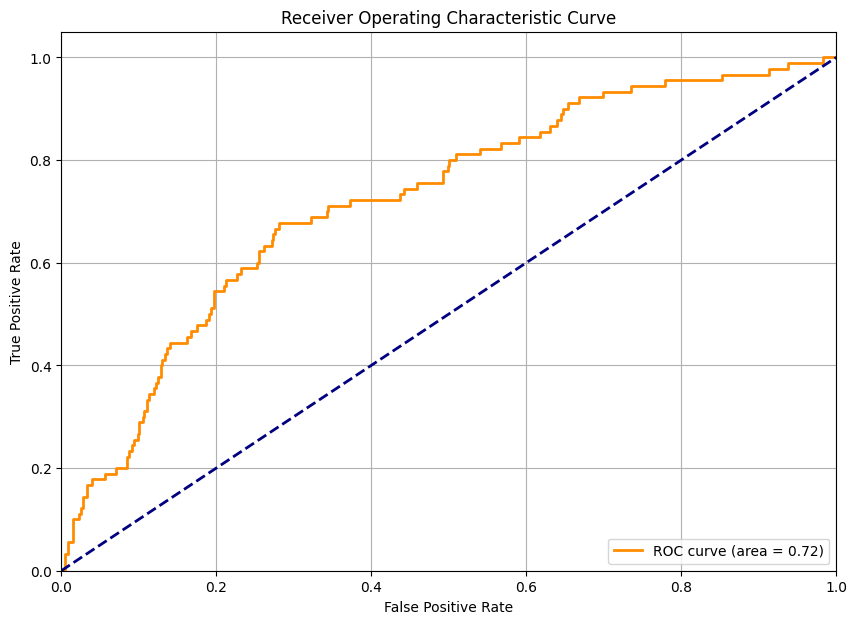

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report,roc_curve, roc_auc_score

# Convert probabilities to binary predictions if necessary
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Conclusion

In this analysis, we explored the Framingham Heart Study dataset to understand and predict heart disease risk. The primary goal was to identify key features that are correlated with the likelihood of having heart disease and to build a predictive model.

### Key Findings:

1. **Feature Analysis:**
   - Features such as `age`, `sysBP` (systolic blood pressure), `diaBP` (diastolic blood pressure), and `glucose` demonstrated significant correlations with the target variable `TenYearCHD`, indicating their importance in predicting heart disease.

2. **Data Cleaning:**
   - Missing values were addressed by employing appropriate imputation strategies, such as filling missing values with median or mean where applicable.
   - Outlier removal was performed to enhance the quality of the dataset and to ensure more accurate model performance.

3. **Feature Engineering:**
   - An interaction feature, `age_BMI_interaction`, was created to explore potential non-linear relationships between `age` and `BMI`.

4. **Model Building:**
   - A Linear Regression model was implemented to predict the risk of heart disease. Despite achieving a high accuracy of approximately 87%, the model struggled with the imbalanced nature of the dataset, leading to poor performance in predicting positive cases (i.e., individuals with heart disease).

5. **Model Evaluation:**
   - The performance metrics indicated a high accuracy but also highlighted the challenge in detecting positive cases, as evidenced by the low recall, precision, and F1 score for the positive class.

### Recommendations:

- **Model Improvement:**
  - Consider using more robust models or algorithms such as Logistic Regression, Random Forest, or Gradient Boosting that may handle imbalanced datasets more effectively.
  - Incorporate techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

- **Feature Exploration:**
  - Further investigate additional features or interaction terms that could enhance predictive power.
  - Explore feature scaling and normalization to potentially improve model performance.

Overall, while the analysis provided valuable insights and a preliminary predictive model, further refinement and exploration are necessary to achieve a more balanced and accurate model for heart disease prediction.
